<a href="https://colab.research.google.com/github/sai-bharghav/Deep-Learning/blob/main/PyTorch_Workflow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# 1st one
Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

## a) Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [2]:
# Create a straight line
weight = 0.3
bias = 0.9

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device : {device}') # Check what is the device we are on (agnostic coding)

start = 0
end = 1
step = 0.01
X = torch.arange(start,end,step).unsqueeze(dim=1)

# # Create y using the linear regression formulae
y = weight * X + bias
print(f'Length of X as a line is {len(X)} points, Shape of the tensor is {X.shape}' )

Device : cpu
Length of X as a line is 100 points, Shape of the tensor is torch.Size([100, 1])


## Split the data into 80% training, 20% testing.

In [3]:
train_split = int(0.8 * len(X))

# Split the data inot X_train , y_train, X_test, y_test
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =X[train_split:],y[train_split:]

len(X_train),len(X_test),len(y_train),len(y_test)

(80, 20, 80, 20)

In [9]:
X_train,X_test

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

## Plot the training and testing data so it becomes visual

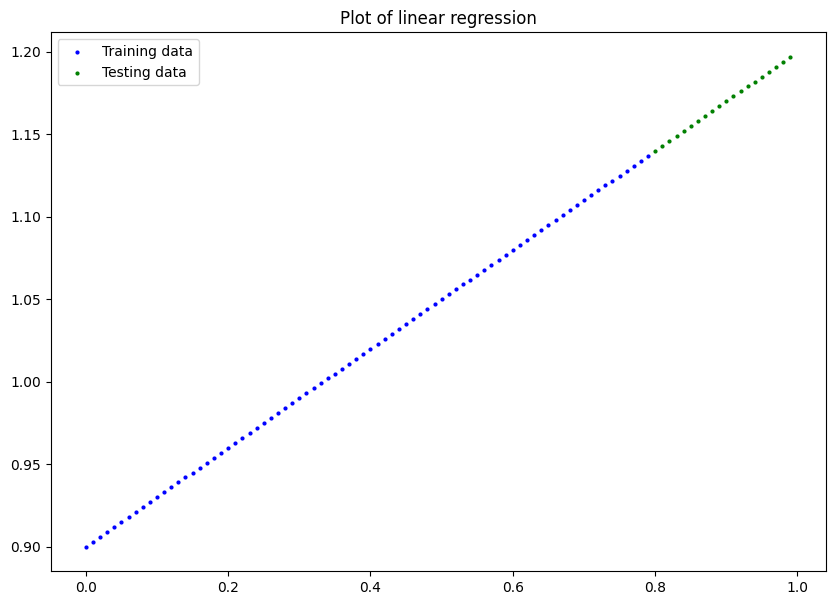

In [7]:
# Let us create a fucntion like we did in the course
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label='Training data')
  plt.scatter(test_data,test_labels,c='g',s=4,label='Testing data')

  if predictions is not None:
    plt.scatter(test_data,predictions,c='r',s=4,label='Predictions')
  plt.title('Plot of linear regression')
  plt.legend()
  plt.show()

plot_predictions()

# 2nd Question

Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for weights and one for bias.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its `state_dict()`.


**Note**: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [14]:
class LinearRegressionModel(nn.Module): # Inherits the parent class nn.Module (base class)
  def __init__(self):
      super().__init__()# call the constructor for base class
      self.linear_layer = nn.Linear(in_features=1,out_features=1) # Define the layer
  def forward(self,x:torch.Tensor)->torch.Tensor: # SHould override the method whenever a class inherits nn.Module class
    return self.linear_layer(x)
torch.manual_seed(43)# Setting a manual seed
model_0 = LinearRegressionModel() # Instanciate the model
model_0.state_dict()# Check the dict

OrderedDict([('linear_layer.weight', tensor([[-0.0921]])),
             ('linear_layer.bias', tensor([-0.6070]))])

In [16]:
next(model_0.parameters()).device

device(type='cpu')

In [19]:
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

# 3rd Question


## a) Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.

In [20]:
# Set up the loss function
loss_fn = torch.nn.L1Loss()

# Set up the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)


## b) Write a training loop to perform the appropriate training steps for 300 epochs
* The training loop should test the model on the test dataset every 20 epochs.

In [26]:
# Set the epochs
epochs = 300

epoch_list=[]
loss_track=[]
test_loss_track=[]

for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # Forward pass
  y_preds=model_0(X_train)

  # loss function
  loss= loss_fn(y_preds,y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # backward propogation
  loss.backward()

  # Perform gradient descent
  optimizer.step()

  ## TESTING
  # set the model to evaluation mode to stop some settings
  model_0.eval()
  with torch.inference_mode():
    # predict the values
    test_values = model_0(X_test)
    # loss function for y_test
    test_loss = loss_fn(test_values,y_test)

    if epoch%20==0:
      print(f'Epoch : {epoch} | test loss : {test_loss} | Training loss : {loss}')

Epoch : 0 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 20 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 40 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 60 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 80 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 100 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 120 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 140 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 160 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 180 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 200 | test loss : 0.0065288422629237175 | Training loss : 0.0032220049761235714
Epoch : 220 | test loss : 0.0065288422

In [27]:
# Let us check the state_dcit
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3076]])),
             ('linear_layer.bias', tensor([0.9002]))])

# 4 Question
Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [28]:
# Predictions
with torch.inference_mode():
  test_preds = model_0(X_test)
test_preds

tensor([[1.1463],
        [1.1494],
        [1.1524],
        [1.1555],
        [1.1586],
        [1.1617],
        [1.1647],
        [1.1678],
        [1.1709],
        [1.1740],
        [1.1770],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1986],
        [1.2016],
        [1.2047]])

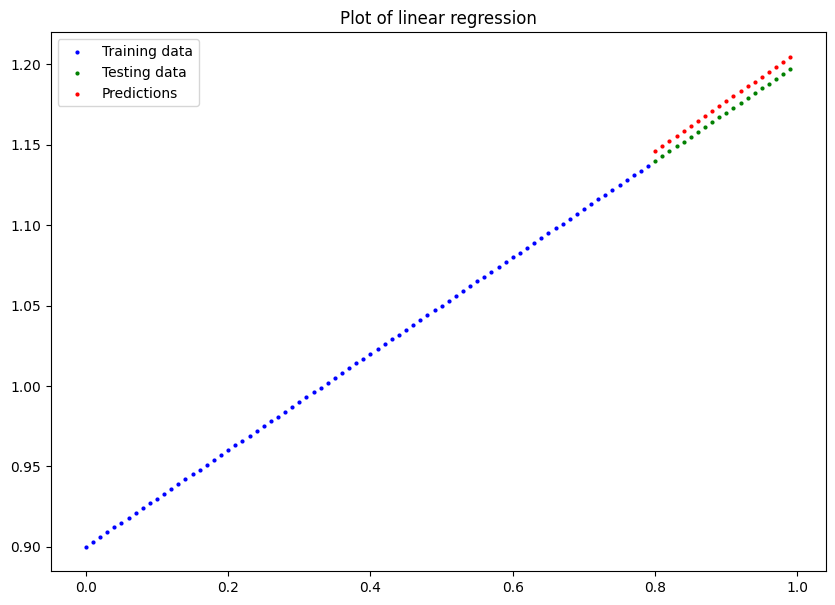

In [29]:
plot_predictions(predictions=test_preds)